In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [2]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [3]:
# in this data sets their are 70K image, each image has 28* 28 pixels,10 classification(0-9), suppose 128 nodes, output is 10 nodes(0-9)
# first layer parameters 28*28+128,
# Second/last layer parameters 128*10+10

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
# First image pixels
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [7]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

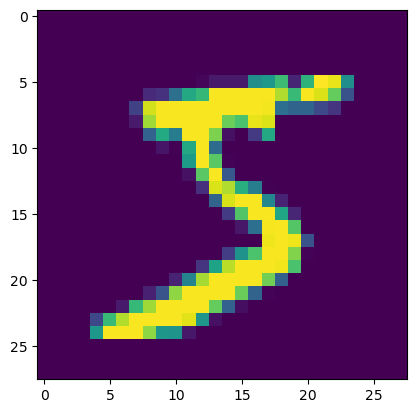

In [8]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

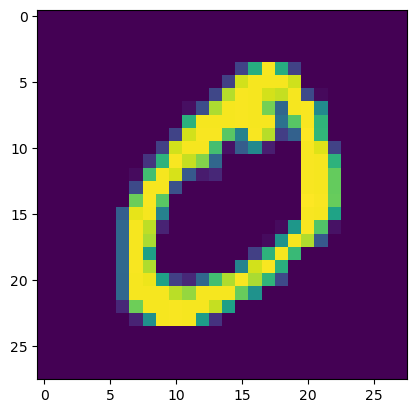

In [9]:
plt.imshow(X_train[1])

In [10]:
# try to standaried the data it is best approach to handle the deep learning projects
X_train= X_train/255
X_test= X_test/255

In [11]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [12]:
# now make artificial neural network
model = Sequential()

In [13]:
# Use flatten function to convert 28*28 pixels metrice into 784*1 pixcels convet into 1-D
model.add(Flatten(input_shape=(28,28)))


C:\Users\prince_singh04\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
model.add(Dense(128, activation='relu')) # one hidden layer
model.add(Dense(32, activation='relu')) #  second hidden layer

model.add(Dense(10,activation='softmax'))  # output layer

In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 104,938 (409.91 KB)

 Trainable params: 104,938 (409.91 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])  #by using this loss fuction you dont need to used onehot encoder


In [17]:
history=model.fit(X_train,y_train, epochs=25, validation_split=0.2)

Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8598 - loss: 0.4906 - val_accuracy: 0.9579 - val_loss: 0.1468
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9613 - loss: 0.1287 - val_accuracy: 0.9546 - val_loss: 0.1476
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9730 - loss: 0.0869 - val_accuracy: 0.9701 - val_loss: 0.0970
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9834 - loss: 0.0564 - val_accuracy: 0.9694 - val_loss: 0.1002
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9864 - loss: 0.0427 - val_accuracy: 0.9730 - val_loss: 0.0949
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9888 - loss: 0.0349 - val_accuracy: 0.9741 - val_loss: 0.0896
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9914 - loss: 0.0274 - val_accuracy: 0.9722 - val_loss: 0.0971
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9916 - loss: 0.024

In [18]:
y_prob=model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [19]:
y_prob

array([[4.4139466e-20, 2.4210851e-16, 5.0819293e-14, ..., 1.0000000e+00,
        5.1181331e-15, 5.5808815e-08],
       [1.1928253e-19, 9.8925215e-14, 1.0000000e+00, ..., 1.2921666e-24,
        5.5794114e-20, 1.0384200e-31],
       [1.6396148e-11, 9.9999261e-01, 5.0282733e-07, ..., 1.2997660e-06,
        5.5905894e-06, 6.0770764e-15],
       ...,
       [2.9745031e-29, 5.6954167e-16, 2.2308640e-27, ..., 7.7492466e-12,
        1.1744652e-14, 1.0879977e-08],
       [1.6557094e-17, 2.1597166e-24, 4.6290105e-26, ..., 8.7730259e-20,
        2.0453847e-11, 8.5440366e-22],
       [2.7455297e-18, 7.2486737e-25, 7.5916750e-26, ..., 4.6360133e-24,
        1.0879615e-21, 1.0431456e-29]], dtype=float32)

In [20]:
y_pred = y_prob.argmax(axis=1)

In [21]:
y_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9726

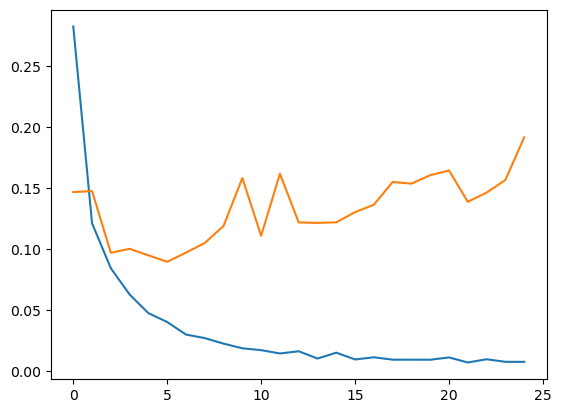

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

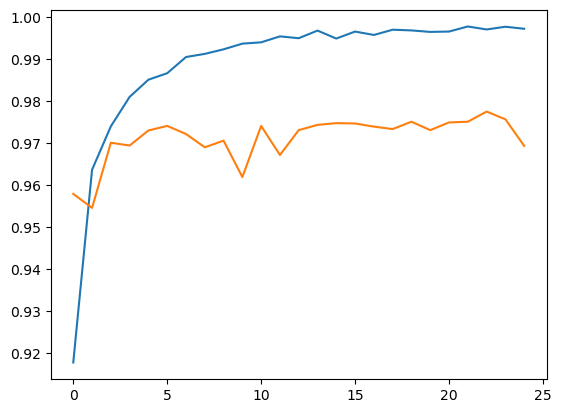

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

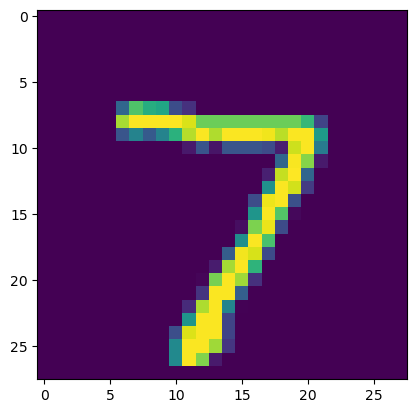

In [25]:
plt.imshow(X_test[0])

In [28]:
model.predict(X_test[0].reshape(1,28,28))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


array([[4.4139298e-20, 2.4211037e-16, 5.0819585e-14, 7.1072415e-09,
        1.8746181e-26, 1.7858006e-18, 2.7094977e-34, 1.0000000e+00,
        5.1181525e-15, 5.5808922e-08]], dtype=float32)

In [29]:
model.predict(X_test[0].reshape(1,28,28)).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


array([7], dtype=int64)

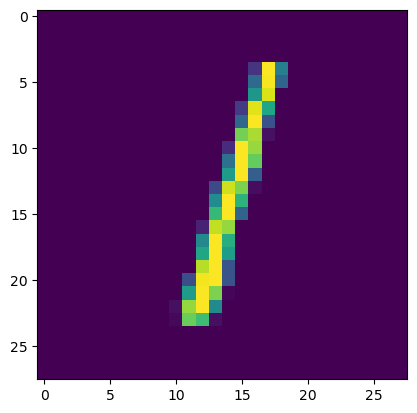

In [33]:
plt.imshow(X_test[2])

In [34]:
model.predict(X_test[2].reshape(1,28,28)).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


array([1], dtype=int64)